# Własna implementacja

In [4]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
x_train=x_train.reshape(x_train.shape[0],-1)/255
x_test=x_test.reshape(x_test.shape[0],-1)/255

In [6]:
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(784,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(10,'softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1766/1875 [===========================>..] - ETA: 0s - loss: 0.4287 - accuracy: 0.8824

KeyboardInterrupt: 

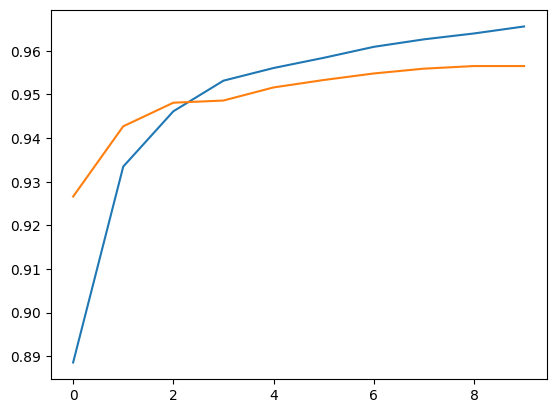

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.show()

# Implementacja z kursu
### Dropout - usunięcie losowych neuronów podczas konkretnych epoch
### Flatten - zmiana kształu danych wejściowych, zmienia 28x28 na 784x1

In [14]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [17]:
x_train=x_train/255
x_test=x_test/255

In [18]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10,'softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2963 - accuracy: 0.9132 - val_loss: 0.1428 - val_accuracy: 0.9561
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1461 - accuracy: 0.9568 - val_loss: 0.1042 - val_accuracy: 0.9678
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1113 - accuracy: 0.9654 - val_loss: 0.0871 - val_accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0887 - accuracy: 0.9724 - val_loss: 0.0750 - val_accuracy: 0.9775
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0774 - accuracy: 0.9758 - val_loss: 0.0724 - val_accuracy: 0.9777
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0669 - accuracy: 0.9790 - val_loss: 0.0689 - val_accuracy: 0.9785
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0614 - accuracy: 0.9804 - val_loss: 0.0764 - val_accuracy:

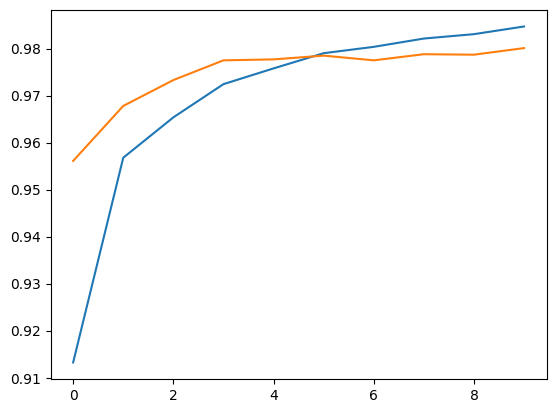

In [19]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.show()

### Obraz wskazujący co model wskazał a jakie były poprawne wyniki oraz wyświetlenie źle dopasowanych obrazów.

313/313 [==============================] - 1s 2ms/step


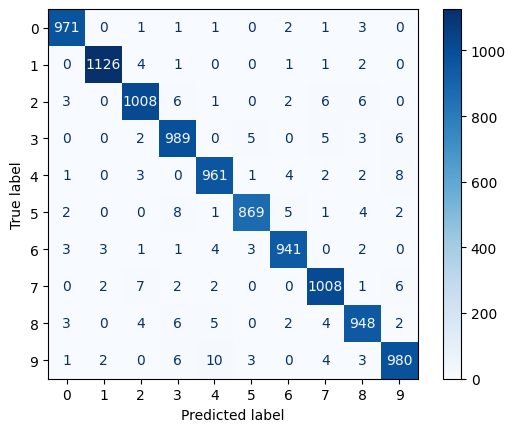

In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Macierz konfuzji
cm = confusion_matrix(y_test, y_pred_labels)

# Wyświetlanie macierzy konfuzji
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

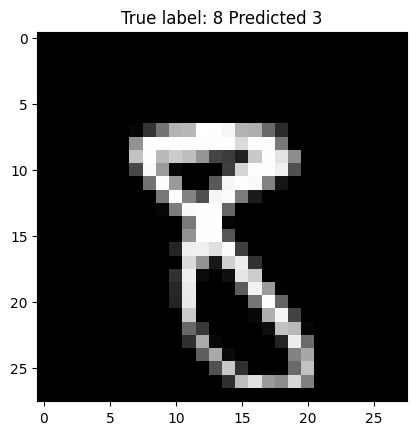

In [49]:
micslassied_idx = np.where(y_pred_labels!=y_test)[0]
i=np.random.choice(micslassied_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted %s" % (y_test[i], y_pred_labels[i]))
plt.show()